## Klasifikasi digit tulisan tangan menggunakan Neural Network

Mengimplementasikan Neural Network untuk mengklasifikasi digit tulisan tangan dalam 10 kelas (0-9) 

Mengimport library

In [1]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt

import numpy as np

Pertama-tama kita megimpor datasetnya, yang mana telah disediakan oleh tensorflow

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

print(len(x_train), len(x_test))

60000 10000


Data yang baru saja di-load berisi 70000 gambar 28 x 28 yang merupakan gambar digit tulisan tangan, yang mana jika diprint hanya menampilkan angka 0-255 yang merepresentasikan seberapa terang/gelap piksel tersebut

Untuk melihat gambar digit tulisan tangan tersebut kita bisa menggunakan matplotlib

(28, 28)


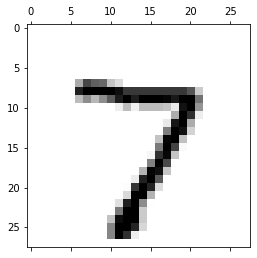

In [3]:
# print(x_train[0])
print(x_test[0].shape)
plt.matshow(x_test[0], cmap='binary') # cmap bisa binary atau gray

Sebelum melangkah dalam proses training neural network kita sebaiknya melakukan pre-processing dan dalam kasus ini yaitu normalisasi dan mereshape matriks menjadi 1 dimensi

#### Normalisasi

Metode normalisasi yang akan digunakan di sini cukup simpel yaitu hanya dengan membagi setiap fitur/matriks dengan 255

In [4]:
x_train= x_train/255
x_test= x_test/255

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Flatten matrix

Me-reshape matriks menjadi matriks 1d

In [5]:
# Menggunakan method reshape untuk mengubah semua matriks dalam array menjadi matriks 1d sepanjang 28*28 atau 784
x_train_flattened= x_train.reshape(len(x_train), x_train.shape[1]*x_train.shape[2])
x_test_flattened= x_test.reshape(len(x_test), x_test.shape[1]*x_test.shape[2])

x_train_flattened.shape

(60000, 784)

### Training model

Membuat model neural network. Berbeda dengan machine learning, kita membuat model dengan cara menyusun layer-layer tersebut sendiri

In [6]:
# Membuat model neural network
model= keras.Sequential([
    # Hidden layer pertama dengan 100 layer dengan layer input 784, menggunakan fungsi aktivasi relu
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    # Hidden layer kedua dengan 100 layer
    keras.layers.Dense(100, activation='relu'),
    # Output layer dengan 10 neuron yang artinya memiliki 10 kelas, dengan fungsi aktivasi sigmoid
    keras.layers.Dense(10, activation='sigmoid')
])

# Mengcompile model, dengan loss function [-?-] dan menggunakan metrik akurasi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Terakhir melakukan fit dengan epochs=10, artinya melakukan training (memperbaiki loss) 10 kali
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2438 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1055 - accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0755 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0576 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0454 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0376 - accuracy: 0.9880: 0s - loss: 0.0371 - ac - ETA: 0s - loss: 0.0369 - accuracy: 
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0299 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0262 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0228 - accuracy: 0.9923
Epoch 10/10
1875/187

### Evaluasi model

Mendapatkan loss dan akurasi dari variabel test

In [7]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9750


[0.102215476334095, 0.9750000238418579]

Misal kita ingin melihat klasifikasi untuk x_test indeks ke-0

In [8]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([4.9313974e-05, 1.0206461e-02, 6.6249073e-03, 4.2031741e-01,
       1.3519028e-05, 2.2387072e-01, 1.8025471e-08, 1.0000000e+00,
       1.3844013e-02, 9.6286917e-01], dtype=float32)

Hasilnya merupakan array 10 elemen yang setiap elemennya berisi seberapa mirip data tersebut dengan output (angka 0-9), maka jika ingin mendapat hasil prediksi, kita hanya perlu mendapatkan indeks dengan angka tertinggi

In [9]:
np.argmax(y_predicted[0])

7

Hasilnya adalah 7, dan merupakan benar

Untuk memudahkan evaluasi maka kita membuat fungsi seperti dibawah

In [10]:
def compare_predictions(pred_arr, true_arr, index):
    print('Gambar: ')
    plt.matshow(true_arr[index], cmap='binary')
    plt.show()
    
    print('Prediksi:', np.argmax(pred_arr[index]))

Gambar: 


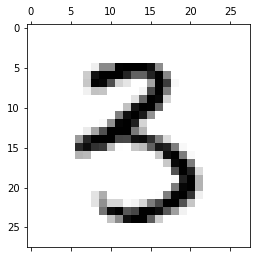

Prediksi: 3


In [11]:
compare_predictions(y_predicted, x_test, 5000)

Gambar: 


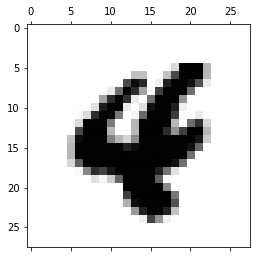

Prediksi: 4


In [12]:
compare_predictions(y_predicted, x_test, 95)